In [107]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [108]:
import sys
sys.path.append('..')

In [109]:
from tf_unet import image_util_fbp
from tf_unet import unet
from tf_unet import util

In [110]:
generator = image_util_fbp.FBPDataProvider("/home/urota/git/tf_unet/data_64/*.png", data_suffix=".png", mask_suffix="_reconst.png", )

Number of files used: 474
Number of channels: 1
Number of classes: 2


In [111]:
x_test, y_test= generator(1)
print(generator.len())

474


(1, 512, 512, 1)
-256.0 254.0
-136.0 254.0


<Figure size 432x288 with 0 Axes>

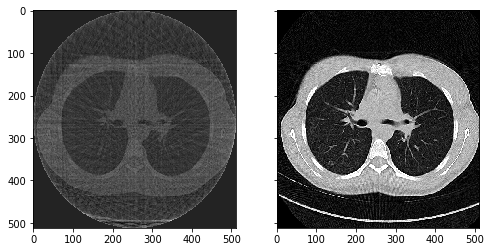

In [112]:
plt.gray()
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
print(y_test.shape)
print(np.min(x_test), np.max(x_test))
print(np.min(y_test), np.max(y_test))
ax[0].imshow(x_test[0, ..., 0], aspect="auto")
ax[1].imshow(y_test[0, ..., 0], aspect="auto")

In [113]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, cost="euclidean", layers=5, features_root=32)

Tensor("output_map/conv2d/dropout/mul_1:0", shape=(?, ?, ?, 1), dtype=float32)
Tensor("preprocessing/Reshape:0", shape=(?, ?, ?, 1), dtype=float32)


In [114]:
trainer = unet.Trainer(net, optimizer="adam", batch_size=1, opt_kwargs=dict(learning_rate=0.0001))

In [115]:
path = trainer.train(generator, "./unet_trained64", training_iters=generator.len(), epochs=101, display_step=2, restore=True)

min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -256.22717
max pred: 297.5084
epoch 0
step 474 : loss 159287.240655
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -263.40704
max pred: 314.78107
epoch 1
step 474 : loss 148944.628956
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -266.37555
max pred: 308.93622
epoch 2
step 474 : loss 134107.660906
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -267.54697
max pred: 291.65356
epoch 3
step 474 : loss 133374.370105
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -264.4512
max pred: 304.99103
epoch 4
step 474 : loss 133239.659588
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -261.43683
max pred: 300.49774
epoch 5
step 474 : loss 132936.880703
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -263.522
max pred: 289.82526
epoch 6
step 474 : loss 132719.394836
min data: -256.0


step 474 : loss 113328.548556
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -280.4086
max pred: 284.01126
epoch 58
step 474 : loss 112534.318673
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -280.6957
max pred: 287.9257
epoch 59
step 474 : loss 116263.415249
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -281.42422
max pred: 281.2016
epoch 60
step 474 : loss 119084.551292
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -282.87402
max pred: 276.73297
epoch 61
step 474 : loss 114781.365374
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -282.58524
max pred: 294.301
epoch 62
step 474 : loss 112106.435044
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -281.19452
max pred: 275.61823
epoch 63
step 474 : loss 110262.366586
min data: -256.0
max data: 254.0
min gt: -256.0
max gt: 254.0
min pred: -280.78223
max pred: 279.2365
epoch 64
step 474 : lo

In [116]:
x_test, y_test = generator(1)

In [117]:
full_archive = np.load('../data_folder/ct/full_archive.npz', allow_pickle = True)

-1024.0 3071.0
-1024.0 1024.0
0.0 1.0
(512, 512)


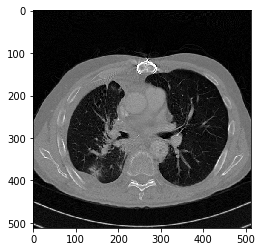

In [118]:
img = full_archive["image"][0]
print(np.min(img), np.max(img))
img2 = np.where(img >= 1024, 1024, img)
print(np.min(img2), np.max(img2))
n_img = img2 / (2048) + .5
print(np.min(n_img), np.max(n_img))
print(img.shape)
plt.gray()
plt.imshow(n_img)

-0.4900507771233101 1.721848195276939


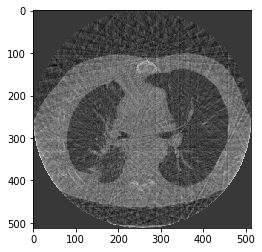

In [119]:
def get_sino(img, size):
    from skimage.transform import radon
    theta = np.linspace(0., 360., size, endpoint=False)
    return radon(img, theta=theta, circle=True)
sino_64 = get_sino(n_img, 64)

def get_my_sino(img, size):
    from mlem.mlem import forward_projection
    sino = forward_projection(img, (size, img.shape[1]))
    return sino / float(size)

def get_fbp(img, size):
    from skimage.transform import iradon
    theta = np.linspace(0., 360., size, endpoint=False)
    return iradon(img, theta=theta, circle=True)

fbp_64 = get_fbp(sino_64, 64)
plt.imshow(fbp_64)

print(np.min(fbp_64), np.max(fbp_64))

In [120]:
from PIL import Image, ImageDraw

x_test = (fbp_64 * 255.).reshape(1, 512, 512, 1)

def get_mask(size):
    mask = Image.new('L', size, 0)
    draw = ImageDraw.Draw(mask)
    draw.ellipse((-1, -1) + size, fill=1)
    mask = np.asarray(mask)
    return mask
mask = get_mask((512, 512))

y_test = (n_img * mask).reshape(1, 512, 512, 1)
import time
start = time.time()
prediction = net.predict("./unet_trained64/model.ckpt", x_test)
elasped = time.time() - start
print("elasped {} sec".format(elasped))

elasped 2.89437699318 sec


0.0
1.0
-194.39297
508.48532


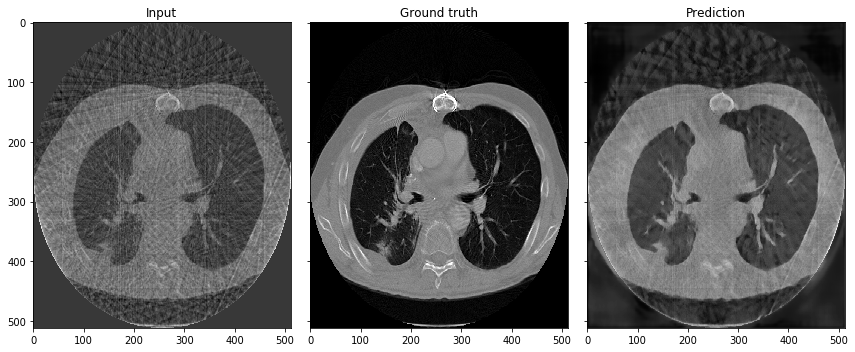

In [121]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,0], aspect="auto")
ax[2].imshow(prediction[0,...,0], aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/fbp_conv.png")
print(np.min(y_test))
print(np.max(y_test))
print(np.min(prediction))
print(np.max(prediction))

rsnr 15.000078796815561
max 1.721848195276939
min -0.4900507771233101
max 1.0
min 0.0
max 1.0
min 0.0
FBPU-Net64
psnr 17.500766662472454
ssim 0.46271118792758253
FBP
psnr 25.154744545617348
ssim 0.47084909543241965


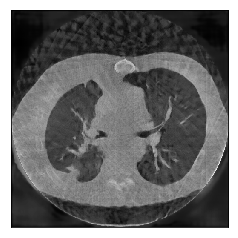

In [122]:
def rsnr(rec, oracle):
    "regressed SNR"
    sumP = sum(oracle.reshape(-1))
    sumI = sum(rec.reshape(-1))
    sumIP = sum(oracle.reshape(-1) * rec.reshape(-1))
    sumI2 = sum(rec.reshape(-1)**2)
    A = np.matrix([[sumI2, sumI], [sumI, oracle.size]])
    b = np.matrix([[sumIP], [sumP]])
    c = np.linalg.inv(A)*b  # (A)\b
    rec = c[0, 0]*rec+c[1, 0]
    err = sum((oracle.reshape(-1)-rec.reshape(-1))**2)
    SNR = 10.0*np.log10(sum(oracle.reshape(-1)**2)/err)

    if np.isnan(SNR):
        SNR = 0.0
    return SNR

def normalize(img):
    mi = np.min(img)
    ma = np.max(img)
    return (img.reshape(512, 512) - mi) / (ma - mi)
    # return img.reshape(512, 512) / 512. + .5

def print_statistics(inp, gt, prediction, caption):
    print("rsnr", rsnr(gt, prediction))
    print("max", np.max(inp))
    print("min", np.min(inp))
    print("max", np.max(gt))
    print("min", np.min(gt))
    print("max", np.max(prediction))
    print("min", np.min(prediction))
    print(caption)
    import skimage
    print("psnr", skimage.measure.compare_psnr(prediction, gt, 1.))
    print("ssim", skimage.measure.compare_ssim(prediction, gt))
    print("FBP")
    print("psnr", skimage.measure.compare_psnr(inp, gt, 2.))
    print("ssim", skimage.measure.compare_ssim(inp, gt))

print_statistics(fbp_64, y_test.reshape(512, 512), normalize(prediction), "FBPU-Net64")

def no_border_show(img):
    plt.tick_params(labelbottom=False,
                labelleft=False,
                labelright=False,
                labeltop=False)
    plt.tick_params(bottom=False,
                left=False,
                right=False,
                top=False)
    plt.imshow(img)

no_border_show(normalize(prediction))

(150, 100)


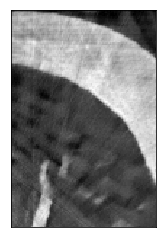

In [123]:
roi_fbp_unet = normalize(prediction)[100:250, 350:450]
print(roi_fbp_unet.shape)
no_border_show(roi_fbp_unet)

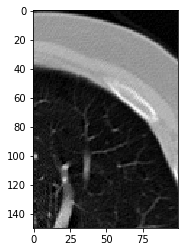

In [81]:
roi_y = y_test.reshape(512, 512)[100:250, 350:450]
plt.imshow(roi_y)

In [84]:
print_statistics(fbp_64[100:250, 350:450], roi_y, roi_fbp_unet, "ROI FBPU-Net64")

rsnr 20.00654826719071
max 0.9529863368458414
min -0.27558936248351495
max 0.75244140625
min 0.0
max 0.48176336
min 0.07779991
ROI FBPU-Net64
psnr 18.069901469571036
ssim 0.587455712395582
FBP
psnr 26.082033890058568
ssim 0.4152124429806511


512
512
<generator object _iter_bytes_to_values at 0x7fc6857db1e0>
int32
29744
33970
#
-3024
1202
0.0
255.0


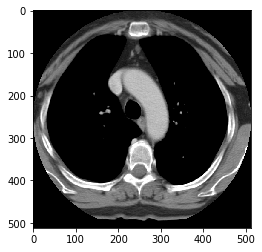

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import png
import numpy as np
from sklearn.preprocessing import minmax_scale
plt.gray()

#reader = png.Reader("/mnt/collect/ct_images/Images_png/000086_04_01/079.png")
reader = png.Reader("/mnt/collect/ct_images/Images_png/000001_01_01/109.png")
pngdata = reader.read()
print(pngdata[0])
print(pngdata[1])
print(pngdata[2])
px_array = np.array(map(np.int32, pngdata[2]))
print(px_array.dtype)
print(np.min(px_array))
print(np.max(px_array))

normalized = px_array - 32768
print("#")
print(np.min(normalized))
print(np.max(normalized))

def intensity_windowing(img, a, b):
    # return img
    assert(a < b)
    return np.minimum(255, np.maximum(0, ((img.astype("float") - a) / (b - a)) * 255))

def show_histogram(img):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.hist(normalized, bins=50)
    fig.show()

normalized = intensity_windowing(normalized, -175, 275)

print(np.min(normalized))
print(np.max(normalized))
plt.imshow(normalized.astype("uint8"))

((512, 64), dtype('float64'))
(0.0, 66944.86666666671)


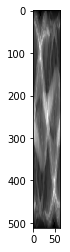

In [115]:
from skimage.transform import radon
import mlem

#shape = (256, 512)
#sino = mlem.mlem.forward_projection(normalized, shape)

theta = np.linspace(0., 360., 64, endpoint=False)
sino = radon(normalized, theta=theta, circle=True)
print(sino.shape, sino.dtype)
print(np.min(sino), np.max(sino))
plt.imshow(sino)

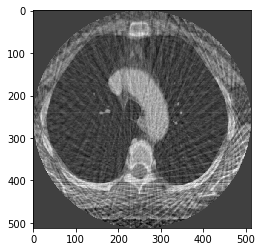

In [116]:
from skimage.transform import iradon

fbp = iradon(sino, theta=theta, circle=True)
plt.imshow(fbp)